# JUICE RPWI HF SID3 (Full): L1a simole QL -- 2024/10/16

In [1]:
# <USAGE>
# [juice_sid3_data.py]
#   1. Please set "base_dir" (L1a CDF directory) properly.

# [JUICE-CDF-HF-SID3_simple.ipynb]
#   1. Please select the date & Version at "get CDF data"
#       ex)  "date='20240126';  ver = 'V05'""
#            if "date='0'" , it reads the data assigned in "juice_sid3_data.py" (data_dir & data_name_list)
# 
#   2. In each plot part, followings can be modified.
#       Dynamic range:      p_min, p_max
#       Frequency range:    f_min, f_max
#       Time range          E_min, E_max

# <<<< Any debug info is welcomed !!! >>>>

# Import lib

In [2]:
import copy
import datetime
import math
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import sys

# CDF and Directory setting: set by User

In [3]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf
import os
os.environ["CDF_LIB"] = "/Applications/cdf/cdf39_1-dist/lib"

# *** Library ***
sys.path.append('./lib/')
import juice_cal_lib   as juice_cal
import juice_cdf_lib   as juice_cdf
import juice_sid3_data as juice_data
import juice_sid3_lib  as juice_sid3
import juice_spec_lib  as juice_spec

# Setting and Read CDF file: set by User

In [4]:
# *** Dump ***
dump_mode = 0                           # 0: no-dump  1:plot dump
# *** CAL ***
unit_mode = 3                           # [Power]     0: raw     1: V＠ADC     2: V@HF    3: V@RWI  4: V/m
band_mode = 1                           # [Power]     0: sum     1: /Hz
cal_mode  = 0                           # [Power]     0: background     1: CAL     2: all
# *** Unit ***
f_mode    = 1                           # [Frequency] 0: linear  1: log
time_mode = 0                           # [Time]      0: Epoch   1: data number
gap_mode  = 1                           # [gap]       0: n/a     1: gap
# *** Frenquency in Linear ***
f_mode_min = 80;  f_mode_max = 2068     # 80 - 2068 : as same as SID-4/20
# *** Power range set ***
p_raw_max = 9.5                         # background: 7.5   CAL: 10
p_raw_min = 2.0                         # background: 2.5   CAL: 5
# *** Directory set: set by User ***
work_dir = '/Users/user/0-python/JUICE_python/ql/'   # Plot dump folder

In [5]:
N_ch0     = 4                           # [channel]   2: 2-ch    3: 3-ch                              >3: any
comp_mode = 4                           # [Complex]   0: Poweer  1: Matrix   2: PolSep  3: Matrix-2D  >3: any

In [6]:
E_min = '2024-08-19 21:05:00';  t_min0 = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S")
E_max = '2024-08-19 21:10:00';  t_max0 = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S")
t_min0 = 0;  t_max0 = 0

# get CDF data

In [7]:
# date='20240126';  ver = 'V05'
date='20240823';  ver = 'V01'
# date='0'
data_dir, data_name_list = juice_data.datalist(date, ver)       # [date]   yyyymmdd: group read    others: file list

/Users/user/D-Univ/data/data-JUICE/datasets/2024/08/23/
['JUICE_L1a_RPWI-HF-SID3_20240823T035818_V01.cdf']


In [8]:
class struct:
    pass

data = struct()
num_list = len(data_name_list)
for i in range(num_list):
    data_name = data_name_list[i];  cdf_file = data_dir + data_name;  print(i, cdf_file)
    RPWI_FSW_version = juice_cdf._RPWI_FSW_version(cdf_file)
    cdf = pycdf.CDF(cdf_file);      data1 = juice_sid3.hf_sid3_read(cdf, RPWI_FSW_version)
    if i==0:
        data = data1;                                print(data.EuEu.shape)
    else:
        data = juice_sid3.hf_sid3_add(data, data1);  print(data.EuEu.shape)
data_name = os.path.split(data_name)[1];             print("data name:", data_name)

0 /Users/user/D-Univ/data/data-JUICE/datasets/2024/08/23/JUICE_L1a_RPWI-HF-SID3_20240823T035818_V01.cdf
(2317, 256)
data name: JUICE_L1a_RPWI-HF-SID3_20240823T035818_V01.cdf


In [9]:
data = juice_sid3.hf_sid3_shaping(data, cal_mode, N_ch0, comp_mode)

  org: (2317, 256) 2317 x 256 [ 593152 ]
  cut: (2317, 256) 2317 x 256 ===> cal-mode: 0
  cut: (2317, 256) 2317 x 256 ===> cal-mode: 0
<only BG>


In [10]:
date1 = data.epoch[0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[-1]; date2 = date2.strftime('%Y/%m/%d %R:%S')
str_date = date1 + "  -  " + date2
n_time0 = data.EuEu.shape[0];    n_freq0 = data.EuEu.shape[1]
f_min0  = data.frequency[0][0];  f_max0  = (max(np.ravel(data.frequency)))

print("       date and time:", str_date)
print("           data size:", data.EuEu.shape, "  [ Num-samples:", n_time0, "  Num-Frequency:", n_freq0, "]")
print("           Frequency:", f_min0,  "-", f_max0, "kHz")
print("f, width, step (kHz):", f_min0,  "-", f_max0, data.freq_width[0][0], data.freq_step[0][0])
print("                      [BAND0] ", 'start {:4d} '.format(data.B0_startf[0]), 'stop {:5d} '.format(data.B0_stopf[0]), 'step {:3d} '.format(data.B0_step[0]), 'repeat {:2d} '.format(data.B0_repeat[0]),  'subdiv {:2d}'.format(data.B0_subdiv[0]), ) 
print("                      [BAND1] ", 'start {:4d} '.format(data.B1_startf[0]), 'stop {:5d} '.format(data.B1_stopf[0]), 'step {:3d} '.format(data.B1_step[0]), 'repeat {:2d} '.format(data.B1_repeat[0]),  'subdiv {:2d}'.format(data.B1_subdiv[0]), ) 
print("                      [BAND2] ", 'start {:4d} '.format(data.B2_startf[0]), 'stop {:5d} '.format(data.B2_stopf[0]), 'step {:3d} '.format(data.B2_step[0]), 'repeat {:2d} '.format(data.B2_repeat[0]),  'subdiv {:2d}'.format(data.B2_subdiv[0]), ) 
print("                      [BAND3] ", 'start {:4d} '.format(data.B3_startf[0]), 'stop {:5d} '.format(data.B3_stopf[0]), 'step {:3d} '.format(data.B3_step[0]), 'repeat {:2d} '.format(data.B3_repeat[0]),  'subdiv {:2d}'.format(data.B3_subdiv[0]), ) 
print("                      [BAND4] ", 'start {:4d} '.format(data.B4_startf[0]), 'stop {:5d} '.format(data.B4_stopf[0]), 'step {:3d} '.format(data.B4_step[0]), 'repeat {:2d} '.format(data.B4_repeat[0]),  'subdiv {:2d}'.format(data.B4_subdiv[0]), ) 

if N_ch0     > 3:   N_ch0     = data.U_selected[0] + data.V_selected[0] + data.W_selected[0]
if comp_mode > 3:   comp_mode = data.complex[0]
print("                  Ch:", N_ch0, "  [U:", data.U_selected[0], "  V:", data.V_selected[0], "  W:", data.W_selected[0], "]")
#
N_frequency = data.frequency.shape[1]
if (comp_mode == 0):
    if N_ch0 == 3:
        print("             complex:", comp_mode, " (power 3-ch) <Table 6.2.2>")
    else:
        print("             complex:", comp_mode, " (power 2-ch) <Table 6.2.3>")
    N_component = N_ch0;          print("       ==> Component:", N_component)
elif (comp_mode == 1):
    if N_ch0 == 3:
        print("             complex:", comp_mode, " (nominal spectral matrix 3-ch) <Table 6.2.4>")
    else:
        print("             complex:", comp_mode, " (nominal spectral matrix 2-ch) <Table 6.2.5>")
    N_component = N_ch0 * N_ch0;  print("       ==> Component:", N_component)
elif (comp_mode == 2):
    if N_ch0 == 3:
        print("             complex:", comp_mode, " (Polarization separation 3-ch) <Table 6.2.6>")
        N_component = 27 + 3;     print("       ==> Component:", N_component)
    else:
        print("             complex:", comp_mode, " (Polarization separation 2-ch) <Table 6.2.7>")
        N_component = 12 + 3;     print("       ==> Component:", N_component)
else:
    print(    "             complex:", comp_mode, " (3D spectral matrix 3-ch) <Table 6.2.8>")
    N_component = 21;             print("       ==> Component:", N_component)
#
print("         BG_downlink:", data.BG_downlink[0])
print("       RFI_rejection:", data.RFI_rejection[0])

       date and time: 2024/08/23 03:58:18  -  2024/08/23 21:54:57
           data size: (2317, 256)   [ Num-samples: 2317   Num-Frequency: 256 ]
           Frequency: 84.625 - 44813.0 kHz
f, width, step (kHz): 84.625 - 44813.0 9.25 9.25
                      [BAND0]  start  191  stop   413  step   1  repeat 16  subdiv 24
                      [BAND1]  start  413  stop   635  step   1  repeat  8  subdiv 12
                      [BAND2]  start  635  stop  1079  step   2  repeat  4  subdiv  6
                      [BAND3]  start 1079  stop  2189  step   5  repeat  2  subdiv  3
                      [BAND4]  start 2189  stop 45035  step 193  repeat  1  subdiv  1
                  Ch: 3   [U: 1   V: 1   W: 1 ]
             complex: 2  (Polarization separation 3-ch) <Table 6.2.6>
       ==> Component: 30
         BG_downlink: 3
       RFI_rejection: 1


# Spectrum Data

In [11]:
T_HF  = data.T_HF_FPGA[n_time0//2];  T_RWI = (data.T_RWI_CH1[n_time0//2] + data.T_RWI_CH2[n_time0//2])/2
print("Temperature(org): ", 'HF - {:.1f}'.format(T_HF), '  RWI - {:.1f}'.format(T_RWI))
if T_HF  > 199 or T_HF  < -50 or math.isnan(T_HF):
   T_HF  = 25;  data.T_HF_FPGA[:] = math.nan
if T_RWI > 199 or T_RWI < -199 or math.isnan(T_RWI):
   T_RWI = 25;  data.T_RWI_CH1[:] = math.nan;  data.T_RWI_CH2[:] = math.nan
print("Temperature(cal): ", 'HF - {:.1f}'.format(T_HF), '  RWI - {:.1f}'.format(T_RWI))

Temperature(org):  HF - 23.0   RWI - 31.0
Temperature(cal):  HF - 23.0   RWI - 31.0


In [12]:
spec = copy.deepcopy(data)
spec = juice_cal.spec_cal(spec,   3, unit_mode, band_mode, T_HF, T_RWI)     # CAL
spec.EE = spec.EuEu + spec.EvEv + spec.EwEw

Epoch_1d  = spec.epoch.tolist();      n_time1 = spec.EuEu.shape[0];  num_1d = np.arange(n_time1)
freq_1d   = spec.freq  [n_time1//2];  n_freq1 = freq_1d.shape[0];    f_min0 = freq_1d[0];  f_max0  = freq_1d[-1]
freq_w_1d = spec.freq_w[n_time1//2]

# NAN
if gap_mode == 1 and time_mode == 0:
    for i in range(n_time1-1):
        if spec.scet[i+1]-spec.scet[i] > 60:
            print("[gap]", i, spec.epoch[i], i+1, spec.epoch[i+1])
            juice_sid3.spec_nan(spec, i);   juice_sid3.spec_nan(spec, i+1)

  ASW: 2.0
Epoch: 2024-08-23 03:58:18.261695 - 2024-08-23 21:54:57.247133
CAL-U (Hz) (dB) (phase): 459.25 -143.14347010803223 0.0
CAL-V (Hz) (dB) (phase): 459.25 -142.85223924150776 -0.32144043329281125
CAL-W (Hz) (dB) (phase): 459.25 -143.10029096120292 0.17045870969221233


In [13]:
spec = juice_spec.hf_getspec_angle    (spec, 3)     # Coherency & ange
spec = juice_spec.hf_getspec_stokes   (spec, 3)     # Stokes and Polarization Parameters 
spec = juice_spec.hf_getspec_stokes_3d(spec)        # 3D Stokes and Polarization Parameters

/Users/user/0-python/JUICE_python/simple/./lib/juice_spec_lib.py:27: RuntimeWarning: invalid value encountered in divide
  spec.E_COHuv_NC = spec.EuEv_re_NC**2 / (spec.EuEu_NC * spec.EvEv_NC)
/Users/user/0-python/JUICE_python/simple/./lib/juice_spec_lib.py:28: RuntimeWarning: invalid value encountered in divide
  spec.E_COHvw_NC = spec.EvEw_re_NC**2 / (spec.EvEv_NC * spec.EwEw_NC)
/Users/user/0-python/JUICE_python/simple/./lib/juice_spec_lib.py:29: RuntimeWarning: invalid value encountered in divide
  spec.E_COHwu_NC = spec.EwEu_re_NC**2 / (spec.EwEw_NC * spec.EuEu_NC)
/Users/user/0-python/JUICE_python/simple/./lib/juice_spec_lib.py:130: RuntimeWarning: invalid value encountered in divide
  dop[j] = (Q[j]*Q[j] + U[j]*U[j] + V[j]*V[j])**0.5 / I[j]   # Degree of Total Polarization
/Users/user/0-python/JUICE_python/simple/./lib/juice_spec_lib.py:131: RuntimeWarning: invalid value encountered in divide
  dol[j] = (Q[j]*Q[j] + U[j]*U[j])**0.5 / I[j]               # Degree of Linear Polariza

In [14]:
p_max0 = p_raw_max + spec.cf/10;  p_min0 = p_raw_min + spec.cf/10
p_max0 = np.ceil(np.log10( np.nanmax( [np.nanmax(spec.EuEu), np.nanmax(spec.EvEv), np.nanmax(spec.EwEw)] ) )*5)/5+.5
p_min0 = np.ceil(np.log10( np.nanmin( [np.nanmin(spec.EuEu), np.nanmin(spec.EvEv), np.nanmin(spec.EwEw)] ) )*5)/5-.5
p_max  = p_max0;                  p_min  = p_min0
print("conversion factor:", '{:.1f}'.format(spec.cf), "    MAX-min:", '{:.1f}'.format(p_max), '({:.1f})'.format(p_max0), '{:.1f}'.format(p_min), '({:.1f})'.format(p_min0), "   str_unit:", spec.str_unit)

conversion factor: -192.0     MAX-min: -11.3 (-11.3) -17.3 (-17.3)    str_unit: [V2/Hz @RWI]


### FT Plot data

In [15]:
# Normal spectrum plots
spec.EE    = spec.EuEu + spec.EvEv + spec.EwEw
EuEu_2d    = spec.EuEu.transpose();     EuEu_med    = np.nanmedian(spec.EuEu,    axis=0)
EvEv_2d    = spec.EvEv.transpose();     EvEv_med    = np.nanmedian(spec.EvEv,    axis=0)
EwEw_2d    = spec.EwEw.transpose();     EwEw_med    = np.nanmedian(spec.EwEw,    axis=0)
EE_2d      = spec.EE.transpose();       EE_med      = np.nanmedian(spec.EE,      axis=0)
E_DoPuv_2d = spec.E_DoLuv.transpose();  E_DoPuv_med = np.nanmedian(spec.E_DoPuv, axis=0)
E_DoPvw_2d = spec.E_DoLvw.transpose();  E_DoPvw_med = np.nanmedian(spec.E_DoPvw, axis=0)
E_DoPwu_2d = spec.E_DoLwu.transpose();  E_DoPwu_med = np.nanmedian(spec.E_DoPwu, axis=0)
E_DoLuv_2d = spec.E_DoLuv.transpose();  E_DoLuv_med = np.nanmedian(spec.E_DoLuv, axis=0)
E_DoLvw_2d = spec.E_DoLvw.transpose();  E_DoLvw_med = np.nanmedian(spec.E_DoLvw, axis=0)
E_DoLwu_2d = spec.E_DoLwu.transpose();  E_DoLwu_med = np.nanmedian(spec.E_DoLwu, axis=0)
E_DoCuv_2d = spec.E_DoCuv.transpose();  E_DoCuv_med = np.nanmedian(spec.E_DoCuv, axis=0)
E_DoCvw_2d = spec.E_DoCvw.transpose();  E_DoCvw_med = np.nanmedian(spec.E_DoCvw, axis=0)
E_DoCwu_2d = spec.E_DoCwu.transpose();  E_DoCwu_med = np.nanmedian(spec.E_DoCwu, axis=0)
E_ANGuv_2d = spec.E_ANGuv.transpose();  E_ANGuv_med = np.nanmedian(spec.E_ANGuv, axis=0)
E_ANGvw_2d = spec.E_ANGvw.transpose();  E_ANGvw_med = np.nanmedian(spec.E_ANGvw, axis=0)
E_ANGwu_2d = spec.E_ANGwu.transpose();  E_ANGwu_med = np.nanmedian(spec.E_ANGwu, axis=0)
E_COHuv_2d = spec.E_ANGwu.transpose();  E_COHuv_med = np.nanmedian(spec.E_COHuv, axis=0)
E_COHvw_2d = spec.E_ANGwu.transpose();  E_COHvw_med = np.nanmedian(spec.E_COHvw, axis=0)
E_COHwu_2d = spec.E_ANGwu.transpose();  E_COHwu_med = np.nanmedian(spec.E_COHwu, axis=0)
E_PHAuv_2d = spec.E_ANGwu.transpose();  E_PHAuv_med = np.nanmedian(spec.E_PHAuv, axis=0)
E_PHAvw_2d = spec.E_ANGwu.transpose();  E_PHAvw_med = np.nanmedian(spec.E_PHAvw, axis=0)
E_PHAwu_2d = spec.E_ANGwu.transpose();  E_PHAwu_med = np.nanmedian(spec.E_PHAwu, axis=0)

# Polsep spectrum plots
spec.EE_NC    = spec.EuEu_NC + spec.EvEv_NC + spec.EwEw_NC
EuEu_NC_2d    = spec.EuEu_NC.transpose();     EuEu_NC_med = np.nanmedian(spec.EuEu_NC,    axis=0)
EvEv_NC_2d    = spec.EvEv_NC.transpose();     EvEv_NC_med = np.nanmedian(spec.EvEv_NC,    axis=0)
EwEw_NC_2d    = spec.EwEw_NC.transpose();     EwEw_NC_med = np.nanmedian(spec.EwEw_NC,    axis=0)
EE_NC_2d      = spec.EE_NC.transpose();       EE_NC_med   = np.nanmedian(spec.EE_NC,      axis=0)
E_DoPuv_NC_2d = spec.E_DoLuv_NC.transpose();  E_DoPuv_NC_med = np.nanmedian(spec.E_DoPuv_NC, axis=0)
E_DoPvw_NC_2d = spec.E_DoLvw_NC.transpose();  E_DoPvw_NC_med = np.nanmedian(spec.E_DoPvw_NC, axis=0)
E_DoPwu_NC_2d = spec.E_DoLwu_NC.transpose();  E_DoPwu_NC_med = np.nanmedian(spec.E_DoPwu_NC, axis=0)
E_DoLuv_NC_2d = spec.E_DoLuv_NC.transpose();  E_DoLuv_NC_med = np.nanmedian(spec.E_DoLuv_NC, axis=0)
E_DoLvw_NC_2d = spec.E_DoLvw_NC.transpose();  E_DoLvw_NC_med = np.nanmedian(spec.E_DoLvw_NC, axis=0)
E_DoLwu_NC_2d = spec.E_DoLwu_NC.transpose();  E_DoLwu_NC_med = np.nanmedian(spec.E_DoLwu_NC, axis=0)
E_DoCuv_NC_2d = spec.E_DoCuv_NC.transpose();  E_DoCuv_NC_med = np.nanmedian(spec.E_DoCuv_NC, axis=0)
E_DoCvw_NC_2d = spec.E_DoCvw_NC.transpose();  E_DoCvw_NC_med = np.nanmedian(spec.E_DoCvw_NC, axis=0)
E_DoCwu_NC_2d = spec.E_DoCwu_NC.transpose();  E_DoCwu_NC_med = np.nanmedian(spec.E_DoCwu_NC, axis=0)
E_ANGuv_NC_2d = spec.E_ANGuv_NC.transpose();  E_ANGuv_NC_med = np.nanmedian(spec.E_ANGuv_NC, axis=0)
E_ANGvw_NC_2d = spec.E_ANGvw_NC.transpose();  E_ANGvw_NC_med = np.nanmedian(spec.E_ANGvw_NC, axis=0)
E_ANGwu_NC_2d = spec.E_ANGwu_NC.transpose();  E_ANGwu_NC_med = np.nanmedian(spec.E_ANGwu_NC, axis=0)
E_COHuv_NC_2d = spec.E_ANGwu_NC.transpose();  E_COHuv_NC_med = np.nanmedian(spec.E_COHuv_NC, axis=0)
E_COHvw_NC_2d = spec.E_ANGwu_NC.transpose();  E_COHvw_NC_med = np.nanmedian(spec.E_COHvw_NC, axis=0)
E_COHwu_NC_2d = spec.E_ANGwu_NC.transpose();  E_COHwu_NC_med = np.nanmedian(spec.E_COHwu_NC, axis=0)
E_PHAuv_NC_2d = spec.E_ANGwu_NC.transpose();  E_PHAuv_NC_med = np.nanmedian(spec.E_PHAuv_NC, axis=0)
E_PHAvw_NC_2d = spec.E_ANGwu_NC.transpose();  E_PHAvw_NC_med = np.nanmedian(spec.E_PHAvw_NC, axis=0)
E_PHAwu_NC_2d = spec.E_ANGwu_NC.transpose();  E_PHAwu_NC_med = np.nanmedian(spec.E_PHAwu_NC, axis=0)

spec.EE_RC    = spec.EuEu_RC + spec.EvEv_RC + spec.EwEw_RC
EuEu_RC_2d    = spec.EuEu_RC.transpose();     EuEu_RC_med = np.nanmedian(spec.EuEu_RC,    axis=0)
EvEv_RC_2d    = spec.EvEv_RC.transpose();     EvEv_RC_med = np.nanmedian(spec.EvEv_RC,    axis=0)
EwEw_RC_2d    = spec.EwEw_RC.transpose();     EwEw_RC_med = np.nanmedian(spec.EwEw_RC,    axis=0)
EE_RC_2d      = spec.EE_RC.transpose();       EE_RC_med   = np.nanmedian(spec.EE_RC,      axis=0)
E_DoPuv_RC_2d = spec.E_DoLuv_RC.transpose();  E_DoPuv_RC_med = np.nanmedian(spec.E_DoPuv_RC, axis=0)
E_DoPvw_RC_2d = spec.E_DoLvw_RC.transpose();  E_DoPvw_RC_med = np.nanmedian(spec.E_DoPvw_RC, axis=0)
E_DoPwu_RC_2d = spec.E_DoLwu_RC.transpose();  E_DoPwu_RC_med = np.nanmedian(spec.E_DoPwu_RC, axis=0)
E_DoLuv_RC_2d = spec.E_DoLuv_RC.transpose();  E_DoLuv_RC_med = np.nanmedian(spec.E_DoLuv_RC, axis=0)
E_DoLvw_RC_2d = spec.E_DoLvw_RC.transpose();  E_DoLvw_RC_med = np.nanmedian(spec.E_DoLvw_RC, axis=0)
E_DoLwu_RC_2d = spec.E_DoLwu_RC.transpose();  E_DoLwu_RC_med = np.nanmedian(spec.E_DoLwu_RC, axis=0)
E_DoCuv_RC_2d = spec.E_DoCuv_RC.transpose();  E_DoCuv_RC_med = np.nanmedian(spec.E_DoCuv_RC, axis=0)
E_DoCvw_RC_2d = spec.E_DoCvw_RC.transpose();  E_DoCvw_RC_med = np.nanmedian(spec.E_DoCvw_RC, axis=0)
E_DoCwu_RC_2d = spec.E_DoCwu_RC.transpose();  E_DoCwu_RC_med = np.nanmedian(spec.E_DoCwu_RC, axis=0)
E_ANGuv_RC_2d = spec.E_ANGuv_RC.transpose();  E_ANGuv_RC_med = np.nanmedian(spec.E_ANGuv_RC, axis=0)
E_ANGvw_RC_2d = spec.E_ANGvw_RC.transpose();  E_ANGvw_RC_med = np.nanmedian(spec.E_ANGvw_RC, axis=0)
E_ANGwu_RC_2d = spec.E_ANGwu_RC.transpose();  E_ANGwu_RC_med = np.nanmedian(spec.E_ANGwu_RC, axis=0)
E_COHuv_RC_2d = spec.E_ANGwu_RC.transpose();  E_COHuv_RC_med = np.nanmedian(spec.E_COHuv_RC, axis=0)
E_COHvw_RC_2d = spec.E_ANGwu_RC.transpose();  E_COHvw_RC_med = np.nanmedian(spec.E_COHvw_RC, axis=0)
E_COHwu_RC_2d = spec.E_ANGwu_RC.transpose();  E_COHwu_RC_med = np.nanmedian(spec.E_COHwu_RC, axis=0)
E_PHAuv_RC_2d = spec.E_ANGwu_RC.transpose();  E_PHAuv_RC_med = np.nanmedian(spec.E_PHAuv_RC, axis=0)
E_PHAvw_RC_2d = spec.E_ANGwu_RC.transpose();  E_PHAvw_RC_med = np.nanmedian(spec.E_PHAvw_RC, axis=0)
E_PHAwu_RC_2d = spec.E_ANGwu_RC.transpose();  E_PHAwu_RC_med = np.nanmedian(spec.E_PHAwu_RC, axis=0)

spec.EE_LC    = spec.EuEu_LC + spec.EvEv_LC + spec.EwEw_LC
EuEu_LC_2d    = spec.EuEu_LC.transpose();     EuEu_NC_med = np.nanmedian(spec.EuEu_LC,    axis=0)
EvEv_LC_2d    = spec.EvEv_LC.transpose();     EvEv_NC_med = np.nanmedian(spec.EvEv_LC,    axis=0)
EwEw_LC_2d    = spec.EwEw_LC.transpose();     EwEw_NC_med = np.nanmedian(spec.EwEw_LC,    axis=0)
EE_LC_2d      = spec.EE_LC.transpose();       EE_NC_med   = np.nanmedian(spec.EE_LC,      axis=0)
E_DoPuv_LC_2d = spec.E_DoLuv_LC.transpose();  E_DoPuv_NC_med = np.nanmedian(spec.E_DoPuv_LC, axis=0)
E_DoPvw_LC_2d = spec.E_DoLvw_LC.transpose();  E_DoPvw_NC_med = np.nanmedian(spec.E_DoPvw_LC, axis=0)
E_DoPwu_LC_2d = spec.E_DoLwu_LC.transpose();  E_DoPwu_NC_med = np.nanmedian(spec.E_DoPwu_LC, axis=0)
E_DoLuv_LC_2d = spec.E_DoLuv_LC.transpose();  E_DoLuv_NC_med = np.nanmedian(spec.E_DoLuv_LC, axis=0)
E_DoLvw_LC_2d = spec.E_DoLvw_LC.transpose();  E_DoLvw_NC_med = np.nanmedian(spec.E_DoLvw_LC, axis=0)
E_DoLwu_LC_2d = spec.E_DoLwu_LC.transpose();  E_DoLwu_NC_med = np.nanmedian(spec.E_DoLwu_LC, axis=0)
E_DoCuv_LC_2d = spec.E_DoCuv_LC.transpose();  E_DoCuv_NC_med = np.nanmedian(spec.E_DoCuv_LC, axis=0)
E_DoCvw_LC_2d = spec.E_DoCvw_LC.transpose();  E_DoCvw_NC_med = np.nanmedian(spec.E_DoCvw_LC, axis=0)
E_DoCwu_LC_2d = spec.E_DoCwu_LC.transpose();  E_DoCwu_NC_med = np.nanmedian(spec.E_DoCwu_LC, axis=0)
E_ANGuv_LC_2d = spec.E_ANGuv_LC.transpose();  E_ANGuv_NC_med = np.nanmedian(spec.E_ANGuv_LC, axis=0)
E_ANGvw_LC_2d = spec.E_ANGvw_LC.transpose();  E_ANGvw_NC_med = np.nanmedian(spec.E_ANGvw_LC, axis=0)
E_ANGwu_LC_2d = spec.E_ANGwu_LC.transpose();  E_ANGwu_NC_med = np.nanmedian(spec.E_ANGwu_LC, axis=0)
E_COHuv_LC_2d = spec.E_ANGwu_LC.transpose();  E_COHuv_NC_med = np.nanmedian(spec.E_COHuv_LC, axis=0)
E_COHvw_LC_2d = spec.E_ANGwu_LC.transpose();  E_COHvw_NC_med = np.nanmedian(spec.E_COHvw_LC, axis=0)
E_COHwu_LC_2d = spec.E_ANGwu_LC.transpose();  E_COHwu_NC_med = np.nanmedian(spec.E_COHwu_LC, axis=0)
E_PHAuv_LC_2d = spec.E_ANGwu_LC.transpose();  E_PHAuv_NC_med = np.nanmedian(spec.E_PHAuv_LC, axis=0)
E_PHAvw_LC_2d = spec.E_ANGwu_LC.transpose();  E_PHAvw_NC_med = np.nanmedian(spec.E_PHAvw_LC, axis=0)
E_PHAwu_LC_2d = spec.E_ANGwu_LC.transpose();  E_PHAwu_NC_med = np.nanmedian(spec.E_PHAwu_LC, axis=0)

f_min0 = freq_1d[0];  f_max0 = freq_1d[N_frequency-1]
print(spec.str_unit, "   f_MAX/min:", f_max0, f_min0, "   num of f, step, window:", N_frequency, data.freq_step[0][0], data.freq_width[0][0])

[V2/Hz @RWI]    f_MAX/min: 44813.0 84.625    num of f, step, window: 256 9.25 9.25


## Spec

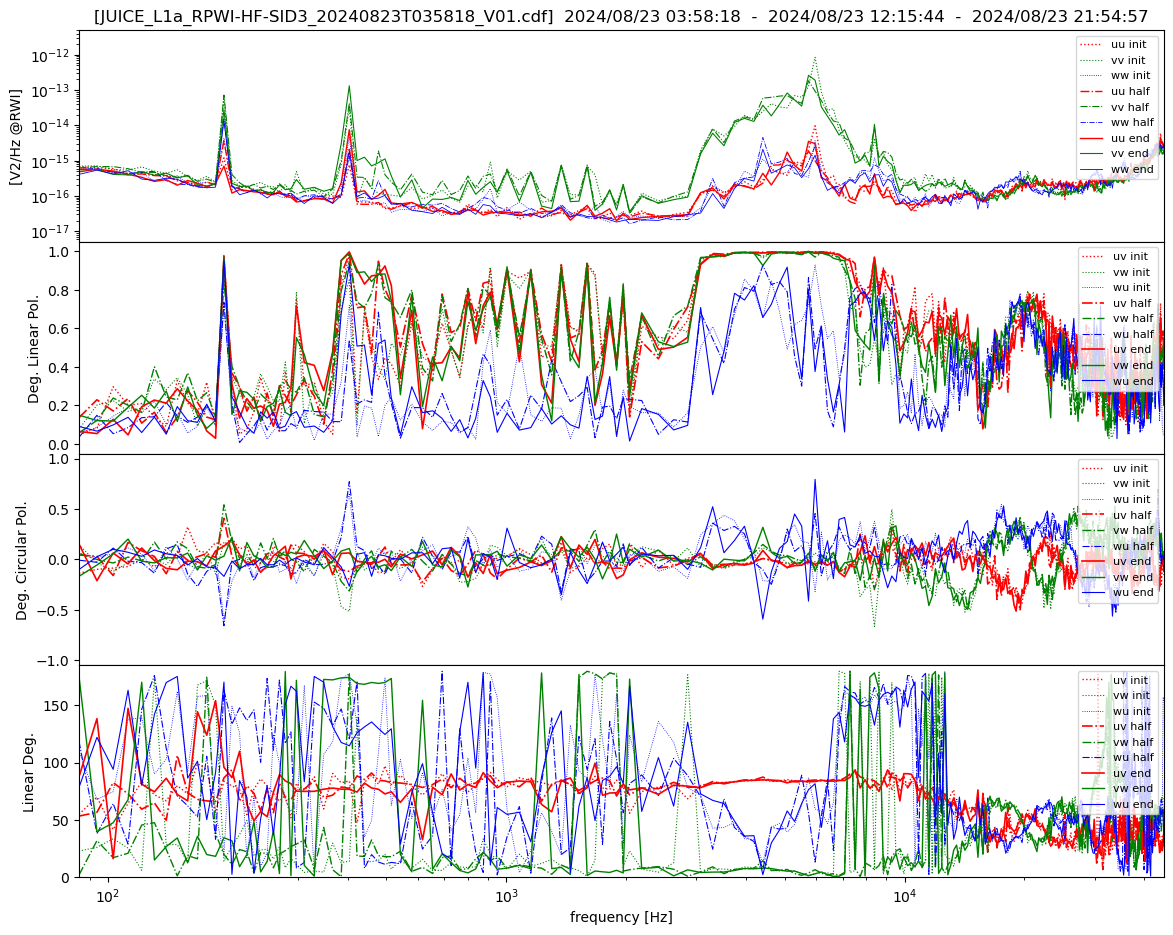

In [16]:
n0 = 0;  n1 = n_time0//2;   n2 = n_time0-1
# n0 = 60;  n1 = 63;   n2 = 66
p_min = p_min0;  p_max = p_max0
f_min = f_min0;  f_max = f_max0

fig = plt.figure(figsize=(14, 11))
if comp_mode > 0:    # Matrix
    ax1 = fig.add_subplot(4, 1, 1);  ax2 = fig.add_subplot(4, 1, 2);  ax3 = fig.add_subplot(4, 1, 3);  ax4 = fig.add_subplot(4, 1, 4)
else:
    ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(freq_1d, spec.EuEu[n0], ':r',  linewidth=1.0, label='uu init')
ax1.plot(freq_1d, spec.EvEv[n0], ':g',  linewidth=0.8, label='vv init')
ax1.plot(freq_1d, spec.EwEw[n0], ':b',  linewidth=0.6, label='ww init')
ax1.plot(freq_1d, spec.EuEu[n1], '-.r', linewidth=1.0, label='uu half')
ax1.plot(freq_1d, spec.EvEv[n1], '-.g', linewidth=0.8, label='vv half')
ax1.plot(freq_1d, spec.EwEw[n1], '-.b', linewidth=0.6, label='ww half')
ax1.plot(freq_1d, spec.EuEu[n2], '-r',  linewidth=1.0, label='uu end')
ax1.plot(freq_1d, spec.EvEv[n2], '-g',  linewidth=0.8, label='vv end')
ax1.plot(freq_1d, spec.EwEw[n2], '-b',  linewidth=0.6, label='ww end')
ax1.set_yscale('log')
if f_mode == 1:
    ax1.set_xscale('log')
#
if comp_mode > 0:    # Matrix
    ax2.plot(freq_1d, spec.E_DoLuv[n0], ':r',  linewidth=1.0, label='uv init')
    ax2.plot(freq_1d, spec.E_DoLvw[n0], ':g',  linewidth=0.8, label='vw init')
    ax2.plot(freq_1d, spec.E_DoLwu[n0], ':b',  linewidth=0.6, label='wu init')
    ax2.plot(freq_1d, spec.E_DoLuv[n1], '-.r', linewidth=1.2, label='uv half')
    ax2.plot(freq_1d, spec.E_DoLvw[n1], '-.g', linewidth=1.0, label='vw half')
    ax2.plot(freq_1d, spec.E_DoLwu[n1], '-.b', linewidth=0.8, label='wu half')
    ax2.plot(freq_1d, spec.E_DoLuv[n2], '-r',  linewidth=1.2, label='uv end')
    ax2.plot(freq_1d, spec.E_DoLvw[n2], '-g',  linewidth=1.0, label='vw end')
    ax2.plot(freq_1d, spec.E_DoLwu[n2], '-b',  linewidth=0.8, label='wu end')
    ax3.plot(freq_1d, spec.E_DoCuv[n0], ':r',  linewidth=1.0, label='uv init')
    ax3.plot(freq_1d, spec.E_DoCvw[n0], ':g',  linewidth=0.8, label='vw init')
    ax3.plot(freq_1d, spec.E_DoCwu[n0], ':b',  linewidth=0.6, label='wu init')
    ax3.plot(freq_1d, spec.E_DoCuv[n1], '-.r', linewidth=1.2, label='uv half')
    ax3.plot(freq_1d, spec.E_DoCvw[n1], '-.g', linewidth=1.0, label='vw half')
    ax3.plot(freq_1d, spec.E_DoCwu[n1], '-.b', linewidth=0.8, label='wu half')
    ax3.plot(freq_1d, spec.E_DoCuv[n2], '-r',  linewidth=1.2, label='uv end')
    ax3.plot(freq_1d, spec.E_DoCvw[n2], '-g',  linewidth=1.0, label='vw end')
    ax3.plot(freq_1d, spec.E_DoCwu[n2], '-b',  linewidth=0.8, label='wu end')
    ax4.plot(freq_1d, spec.E_ANGuv[n0], ':r',  linewidth=1.0, label='uv init')
    ax4.plot(freq_1d, spec.E_ANGvw[n0], ':g',  linewidth=0.8, label='vw init')
    ax4.plot(freq_1d, spec.E_ANGwu[n0], ':b',  linewidth=0.6, label='wu init')
    ax4.plot(freq_1d, spec.E_ANGuv[n1], '-.r', linewidth=1.2, label='uv half')
    ax4.plot(freq_1d, spec.E_ANGvw[n1], '-.g', linewidth=1.0, label='vw half')
    ax4.plot(freq_1d, spec.E_ANGwu[n1], '-.b', linewidth=0.8, label='wu half')
    ax4.plot(freq_1d, spec.E_ANGuv[n2], '-r',  linewidth=1.2, label='uv end')
    ax4.plot(freq_1d, spec.E_ANGvw[n2], '-g',  linewidth=1.0, label='vw end')
    ax4.plot(freq_1d, spec.E_ANGwu[n2], '-b',  linewidth=0.8, label='wu end')
    if f_mode == 1:
        ax2.set_xscale('log');  ax3.set_xscale('log');  ax4.set_xscale('log')

ax1.set_ylabel(spec.str_unit)
if comp_mode > 0:    # Matrix
    ax4.set_xlabel('frequency [Hz]');  ax2.set_ylabel('Deg. Linear Pol.');  ax3.set_ylabel('Deg. Circular Pol.');  ax4.set_ylabel('Linear Deg.')    
else:
    ax1.set_xlabel('frequency [Hz]')

date1 = data.epoch[n0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[n1];  date2 = date2.strftime('%Y/%m/%d %R:%S')
date3 = data.epoch[n2];  date3 = date3.strftime('%Y/%m/%d %R:%S')
title_date = "[" + data_name + "]  " + date1 + "  -  " + date2 + "  -  " + date3;  ax1.set_title(title_date)
ax1.legend(loc='upper right', fontsize=8)
if comp_mode > 0:
    ax2.legend(loc='upper right', fontsize=8); ax3.legend(loc='upper right', fontsize=8); ax4.legend(loc='upper right', fontsize=8) 

xlim=[f_min, f_max];  ax1.set_xlim(xlim)
if comp_mode > 0:    # Matrix
    ax2.set_xlim(xlim); ax3.set_xlim(xlim); ax4.set_xlim(xlim)
ylim=[10**p_min, 10**p_max]; ax1.set_ylim(ylim)
if comp_mode > 0:    # Matrix
    ylim=[-0.05, 1.05]; ax2.set_ylim(ylim)
    ylim=[-1.05, 1.05]; ax3.set_ylim(ylim)
    ylim=[-0.05, 185.]; ax4.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_spec.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_spec-log.png'
    fig.savefig(png_fname)

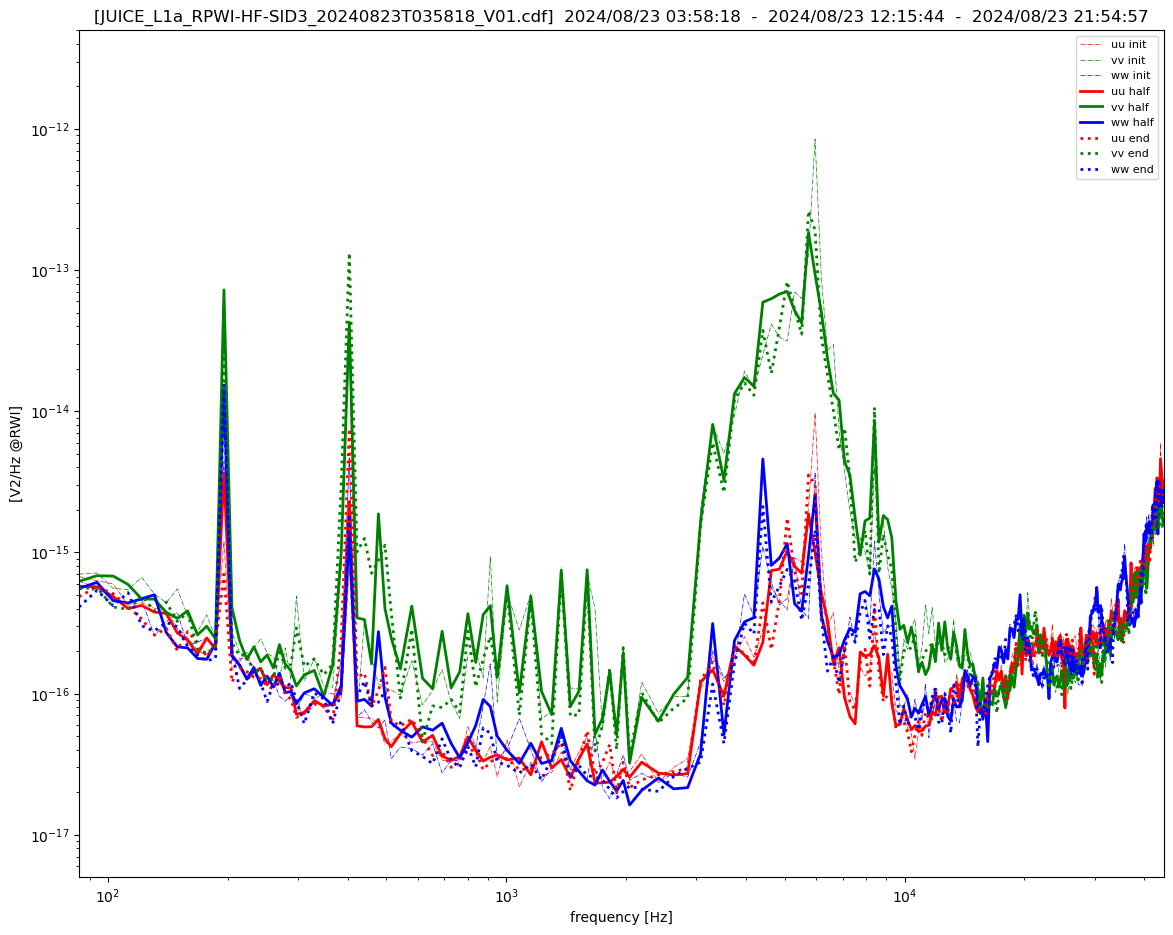

In [17]:
p_min = p_min0;  p_max = p_max0
# p_min = -4.0;    p_max = -0.0
n0 = 0;  n1 = n_time0//2;   n2 = n_time0-1
# n0 = 64;  n1 = 65;   n2 = 66
f_min = f_min0;  f_max = f_max0
# f_min = 80;       f_max = 2068

fig = plt.figure(figsize=(14, 11));  ax1 = fig.add_subplot(1, 1, 1)
#ax1.plot(freq_1d, EuEu_med,      '-r',  linewidth=0.5, label='EuEu_med')
#ax1.plot(freq_1d, EvEv_med,      '-g',  linewidth=0.5, label='EvEv_med')
#ax1.plot(freq_1d, EwEw_med,      '-b',  linewidth=0.5, label='EwEw_med')
ax1.plot(freq_1d, spec.EuEu[n0], '-.r',  linewidth=0.5, label='uu init')
ax1.plot(freq_1d, spec.EvEv[n0], '-.g',  linewidth=0.5, label='vv init')
ax1.plot(freq_1d, spec.EwEw[n0], '-.b',  linewidth=0.5, label='ww init')
ax1.plot(freq_1d, spec.EuEu[n1], '-r', linewidth=2.0, label='uu half')
ax1.plot(freq_1d, spec.EvEv[n1], '-g', linewidth=2.0, label='vv half')
ax1.plot(freq_1d, spec.EwEw[n1], '-b', linewidth=2.0, label='ww half')
ax1.plot(freq_1d, spec.EuEu[n2], ':r',  linewidth=2.0, label='uu end')
ax1.plot(freq_1d, spec.EvEv[n2], ':g',  linewidth=2.0, label='vv end')
ax1.plot(freq_1d, spec.EwEw[n2], ':b',  linewidth=2.0, label='ww end')
ax1.set_yscale('log')
if f_mode == 1:
    ax1.set_xscale('log')

ax1.set_ylabel(spec.str_unit); ax1.set_xlabel('frequency [Hz]')
date1 = data.epoch[n0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[n1];  date2 = date2.strftime('%Y/%m/%d %R:%S')
date3 = data.epoch[n2];  date3 = date3.strftime('%Y/%m/%d %R:%S')
title_date = "[" + data_name + "]  " + date1 + "  -  " + date2 + "  -  " + date3;  ax1.set_title(title_date)
ax1.legend(loc='upper right', fontsize=8)

xlim=[f_min, f_max]
ax1.set_xlim(xlim)
ylim=[10**p_min, 10**p_max]; 
ax1.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_spec2.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_spec2-log.png'
    fig.savefig(png_fname)

## FT

( 0 ) 2024-08-23 03:58:18.261695 - ( 2316 ) 2024-08-23 21:54:57.247133
==> [datetime.datetime(2024, 8, 23, 3, 58, 18, 261695), datetime.datetime(2024, 8, 23, 21, 54, 57, 247133)]


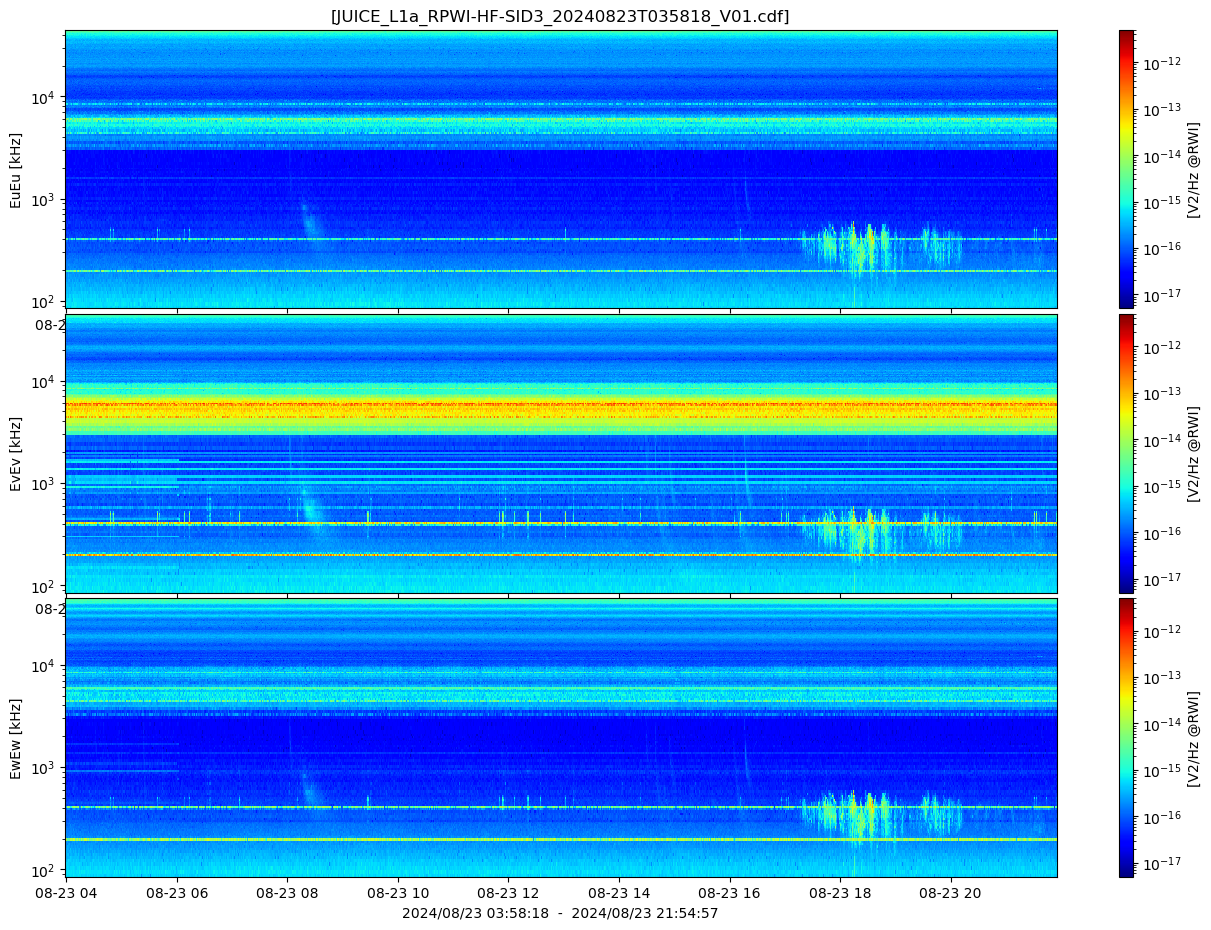

In [18]:
p_min = p_min0;  p_max = p_max0
# p_min = -14.5;     p_max = -13.5
f_min = f_min0;  f_max = f_max0
# f_min = 300;     f_max = 3000
if f_mode == 0:
    f_min = f_mode_min;  f_max = f_mode_max
num_1d = np.arange(n_time0)

fig2d = plt.figure(figsize=[16,11])
if time_mode == 1:
    ax1 = fig2d.add_subplot(4, 1, 1);  ax2 = fig2d.add_subplot(4, 1, 2);  ax3 = fig2d.add_subplot(4, 1, 3); ax4 = fig2d.add_subplot(4, 1, 4)
    ax4.set_xlabel(str_date)
else:
    ax1 = fig2d.add_subplot(3, 1, 1);  ax2 = fig2d.add_subplot(3, 1, 2);  ax3 = fig2d.add_subplot(3, 1, 3)
    ax3.set_xlabel(str_date)
ax1.set_ylim(f_min, f_max);   ax2.set_ylim(f_min, f_max);   ax3.set_ylim(f_min, f_max)
if f_mode == 1:
    ax1.set_yscale('log');    ax2.set_yscale('log');        ax3.set_yscale('log')
ax1.set_ylabel('EuEu [kHz]'); ax2.set_ylabel('EvEv [kHz]'); ax3.set_ylabel('EwEw [kHz]')
ax1.set_title("[" + data_name + "]")

if time_mode == 1:
    p1 = ax1.pcolormesh(num_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p2 = ax2.pcolormesh(num_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p3 = ax3.pcolormesh(num_1d, freq_1d, EwEw_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p4 = ax4.plot(np.ravel(data.epoch[:]), '.')
    pp3 = fig2d.colorbar(p3, ax=ax4, orientation="vertical"); pp3.set_label(spec.str_unit)
else:
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical");  pp1.set_label(spec.str_unit)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical");  pp2.set_label(spec.str_unit)
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical");  pp3.set_label(spec.str_unit)

print( "(", num_1d[0],")", Epoch_1d[0], "-", "(", num_1d[-1],")", Epoch_1d[-1] )
if time_mode == 1:
    xlim=[num_1d[0], num_1d[-1]]
    xlim=[60, 70]
    ax4.set_xlim(xlim)
else:
    if t_min0 == 0:
        xlim=[Epoch_1d[0], Epoch_1d[-1]]
    else:
        xlim=[t_min0, t_max0]
    #E_min = '2024-08-21 04:00:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
    #E_max = '2024-08-21 19:00:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
    print("==>", xlim)
ax1.set_xlim(xlim); ax2.set_xlim(xlim); ax3.set_xlim(xlim)

plt.subplots_adjust(hspace=0.02);  plt.show()
if dump_mode < 1:
    png_fname = work_dir+data_name+'_FT.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_FT-log.png'
    fig2d.savefig(png_fname)

( 0 ) 2024-08-23 03:58:18.261695 - ( 2316 ) 2024-08-23 21:54:57.247133
==> [datetime.datetime(2024, 8, 23, 3, 58, 18, 261695), datetime.datetime(2024, 8, 23, 21, 54, 57, 247133)]


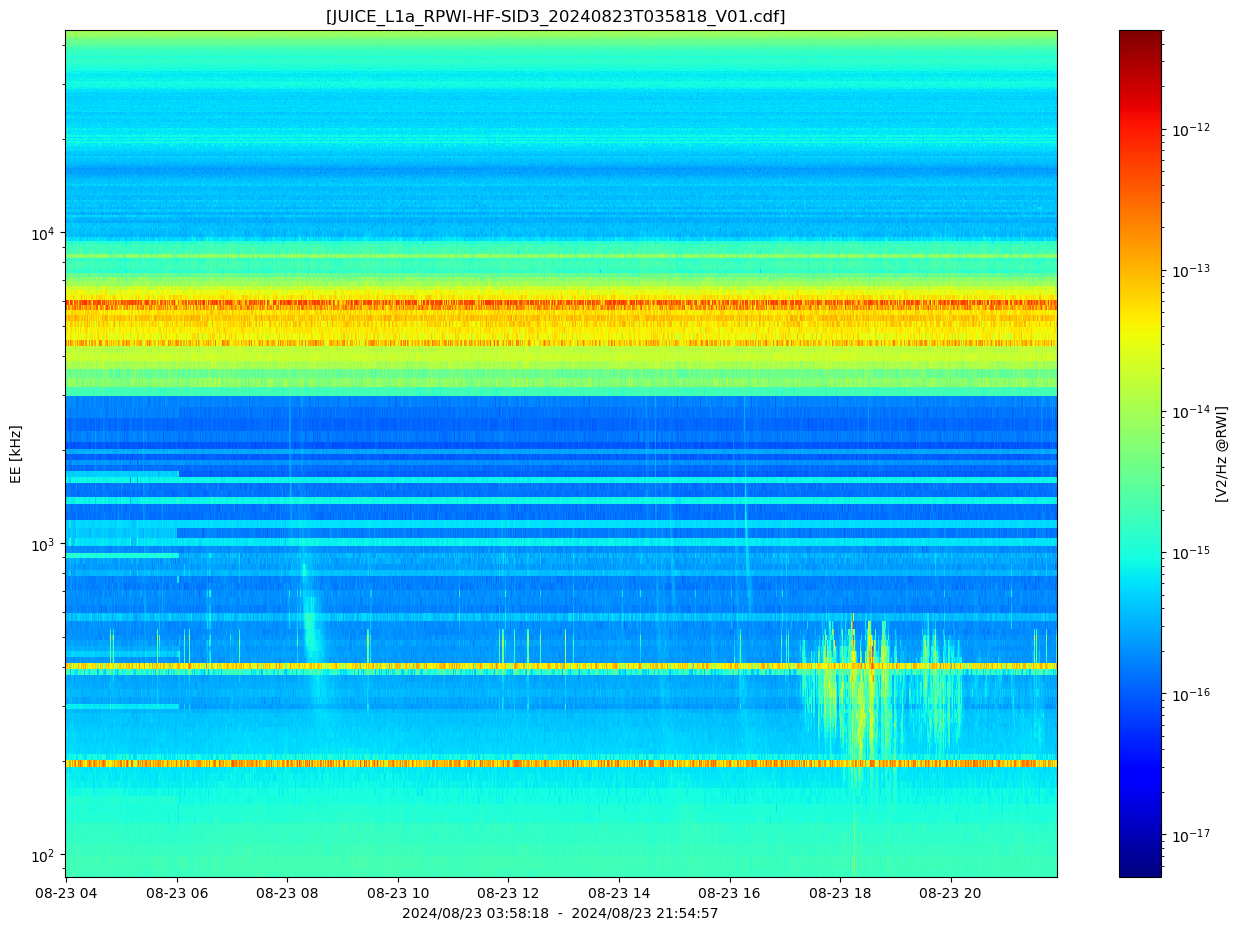

In [19]:
p_min = p_min0;  p_max = p_max0
#p_min = -14;     p_max = -13
f_min = f_min0;  f_max = f_max0
# f_min = 300;     f_max = 3000
if f_mode == 0:
    f_min = f_mode_min;  f_max = f_mode_max

fig2d = plt.figure(figsize=[16,11])
if time_mode == 1:
    ax1 = fig2d.add_subplot(2, 1, 1);  ax2 = fig2d.add_subplot(2, 1, 2);  ax2.set_xlabel(str_date)
else:
    ax1 = fig2d.add_subplot(1, 1, 1);                                     ax1.set_xlabel(str_date)
ax1.set_ylim(f_min, f_max)
if f_mode == 1:
    ax1.set_yscale('log')
ax1.set_ylabel('EE [kHz]');  ax1.set_title("[" + data_name + "]  ")

if time_mode == 1:
    p1 = ax1.pcolormesh(num_1d, freq_1d, EE_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p2 = ax4.plot(np.ravel(data.epoch[:]), '.')
    pp1 = fig2d.colorbar(p1, ax=ax2, orientation="vertical"); pp1.set_label(spec.str_unit)
else:
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EE_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical");  pp1.set_label(spec.str_unit)

print( "(", num_1d[0],")", Epoch_1d[0], "-", "(", num_1d[-1],")", Epoch_1d[-1] )
if time_mode == 1:
    xlim=[num_1d[0], num_1d[-1]]; ax2.set_xlim(xlim) 
else:
    if t_min0 == 0:
        xlim=[Epoch_1d[0], Epoch_1d[-1]]
    else:
        xlim=[t_min0, t_max0]
    #E_min = '2024-08-21 04:00:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
    #E_max = '2024-08-21 19:00:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
    print("==>", xlim)
ax1.set_xlim(xlim)

plt.subplots_adjust(hspace=0.02);  plt.show()
if dump_mode == 1:
    png_fname = work_dir+data_name+'_FT2.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_FT2-log.png'
    fig2d.savefig(png_fname)

## Ang-T

==> [datetime.datetime(2024, 8, 23, 3, 58, 18, 261695), datetime.datetime(2024, 8, 23, 21, 54, 57, 247133)]


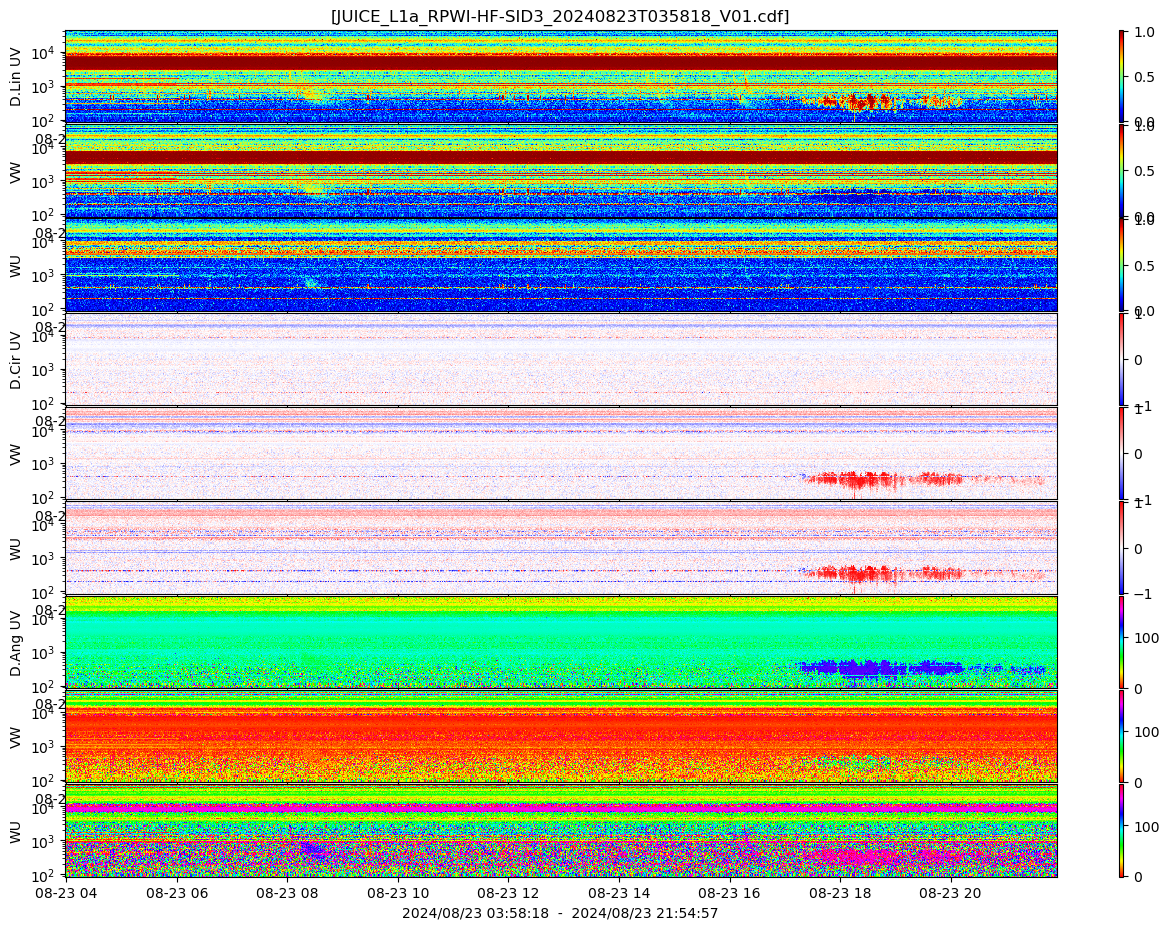

In [20]:
if comp_mode > 0:    # Matrix
    p_min = p_min0;      p_max = p_max0
    f_min = f_min0;      f_max = f_max0
    if f_mode == 0:
        f_min = f_mode_min;  f_max = f_mode_max

    fig2d = plt.figure(figsize=[16,11])
    if time_mode == 1:
        ax1 = fig2d.add_subplot(10, 1, 1); ax2 = fig2d.add_subplot(10, 1, 2); ax3 = fig2d.add_subplot(10, 1, 3)
        ax4 = fig2d.add_subplot(10, 1, 4); ax5 = fig2d.add_subplot(10, 1, 5); ax6 = fig2d.add_subplot(10, 1, 6)
        ax7 = fig2d.add_subplot(10, 1, 7); ax8 = fig2d.add_subplot(10, 1, 8); ax9 = fig2d.add_subplot(10, 1, 9)
        ax10 = fig2d.add_subplot(10, 1, 10);                                                                     ax10.set_xlabel(str_date)
    else:
        ax1 = fig2d.add_subplot(9, 1, 1);  ax2 = fig2d.add_subplot(9, 1, 2);  ax3 = fig2d.add_subplot(9, 1, 3)
        ax4 = fig2d.add_subplot(9, 1, 4);  ax5 = fig2d.add_subplot(9, 1, 5);  ax6 = fig2d.add_subplot(9, 1, 6)
        ax7 = fig2d.add_subplot(9, 1, 7);  ax8 = fig2d.add_subplot(9, 1, 8);  ax9 = fig2d.add_subplot(9, 1, 9);  ax9.set_xlabel(str_date)

    ax1.set_ylim(f_min, f_max); ax2.set_ylim(f_min, f_max); ax3.set_ylim(f_min, f_max); ax4.set_ylim(f_min, f_max); ax5.set_ylim(f_min, f_max)
    ax6.set_ylim(f_min, f_max); ax7.set_ylim(f_min, f_max); ax8.set_ylim(f_min, f_max); ax9.set_ylim(f_min, f_max)
    if f_mode == 1:
        ax1.set_yscale('log');  ax2.set_yscale('log');      ax3.set_yscale('log');      ax4.set_yscale('log');      ax5.set_yscale('log')
        ax6.set_yscale('log');  ax7.set_yscale('log');      ax8.set_yscale('log');      ax9.set_yscale('log')
    ax1.set_ylabel('D.Lin UV'); ax2.set_ylabel('VW'); ax3.set_ylabel('WU')
    ax4.set_ylabel('D.Cir UV'); ax5.set_ylabel('VW'); ax6.set_ylabel('WU')
    ax7.set_ylabel('D.Ang UV'); ax8.set_ylabel('VW'); ax9.set_ylabel('WU'); ax1.set_title("[" + data_name + "]"'')

    if time_mode == 1:
        p1 = ax1.pcolormesh(num_1d, freq_1d, E_DoLuv_2d, norm=colors.Normalize(vmin=-0.01, vmax=1.01), cmap='jet')
        p2 = ax2.pcolormesh(num_1d, freq_1d, E_DoLvw_2d, norm=colors.Normalize(vmin=-0.01, vmax=1.01), cmap='jet')
        p3 = ax3.pcolormesh(num_1d, freq_1d, E_DoLwu_2d, norm=colors.Normalize(vmin=-0.01, vmax=1.01), cmap='jet')
        p4 = ax4.pcolormesh(num_1d, freq_1d, E_DoCuv_2d, norm=colors.Normalize(vmin=-1.01, vmax=1.01), cmap='bwr')
        p5 = ax5.pcolormesh(num_1d, freq_1d, E_DoCvw_2d, norm=colors.Normalize(vmin=-1.01, vmax=1.01), cmap='bwr')
        p6 = ax6.pcolormesh(num_1d, freq_1d, E_DoCwu_2d, norm=colors.Normalize(vmin=-1.01, vmax=1.01), cmap='bwr')
        p7 = ax7.pcolormesh(num_1d, freq_1d, E_ANGuv_2d, norm=colors.Normalize(vmin=-1.00, vmax=181.), cmap='hsv')
        p8 = ax8.pcolormesh(num_1d, freq_1d, E_ANGvw_2d, norm=colors.Normalize(vmin=-1.00, vmax=181.), cmap='hsv')
        p9 = ax9.pcolormesh(num_1d, freq_1d, E_ANGwu_2d, norm=colors.Normalize(vmin=-1.00, vmax=181.), cmap='hsv')
        p10 = ax10.plot(np.ravel(data.epoch[:]), '.');   pp9 = fig2d.colorbar(p9, ax=ax10, orientation="vertical")
    else:
        p1 = ax1.pcolormesh(Epoch_1d, freq_1d, E_DoLuv_2d, norm=colors.Normalize(vmin=-0.01, vmax=1.01), cmap='jet')
        p2 = ax2.pcolormesh(Epoch_1d, freq_1d, E_DoLvw_2d, norm=colors.Normalize(vmin=-0.01, vmax=1.01), cmap='jet')
        p3 = ax3.pcolormesh(Epoch_1d, freq_1d, E_DoLwu_2d, norm=colors.Normalize(vmin=-0.01, vmax=1.01), cmap='jet')
        p4 = ax4.pcolormesh(Epoch_1d, freq_1d, E_DoCuv_2d, norm=colors.Normalize(vmin=-1.01, vmax=1.01), cmap='bwr')
        p5 = ax5.pcolormesh(Epoch_1d, freq_1d, E_DoCvw_2d, norm=colors.Normalize(vmin=-1.01, vmax=1.01), cmap='bwr')
        p6 = ax6.pcolormesh(Epoch_1d, freq_1d, E_DoCwu_2d, norm=colors.Normalize(vmin=-1.01, vmax=1.01), cmap='bwr')
        p7 = ax7.pcolormesh(Epoch_1d, freq_1d, E_ANGuv_2d, norm=colors.Normalize(vmin=-1.00, vmax=181.), cmap='hsv')
        p8 = ax8.pcolormesh(Epoch_1d, freq_1d, E_ANGvw_2d, norm=colors.Normalize(vmin=-1.00, vmax=181.), cmap='hsv')
        p9 = ax9.pcolormesh(Epoch_1d, freq_1d, E_ANGwu_2d, norm=colors.Normalize(vmin=-1.00, vmax=181.), cmap='hsv')
    pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical"); pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
    pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical"); pp4 = fig2d.colorbar(p4, ax=ax4, orientation="vertical")
    pp5 = fig2d.colorbar(p5, ax=ax5, orientation="vertical"); pp6 = fig2d.colorbar(p6, ax=ax6, orientation="vertical")
    pp7 = fig2d.colorbar(p7, ax=ax7, orientation="vertical"); pp8 = fig2d.colorbar(p8, ax=ax8, orientation="vertical")
    pp9 = fig2d.colorbar(p9, ax=ax9, orientation="vertical")
    
    if time_mode == 1:
        xlim=[num_1d[0], num_1d[-1]]
        ax10.set_xlim(xlim)
    else:
        if t_min0==0:
            xlim=[Epoch_1d[0], Epoch_1d[-1]]
        else:
            xlim=[t_min0, t_max0]
        # E_min = '2024-08-21 17:00:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
        # E_max = '2024-08-21 19:00:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
        print("==>", xlim)
    ax1.set_xlim(xlim); ax2.set_xlim(xlim); ax3.set_xlim(xlim); ax4.set_xlim(xlim); ax5.set_xlim(xlim)
    ax6.set_xlim(xlim); ax7.set_xlim(xlim); ax8.set_xlim(xlim); ax9.set_xlim(xlim)

    plt.subplots_adjust(hspace=0.02);  plt.show()
    if dump_mode == 1:
        png_fname = work_dir+data_name+'_AngT.png'
        if f_mode == 1:
            png_fname = work_dir+data_name+'_AngT-log.png'
        fig2d.savefig(png_fname)

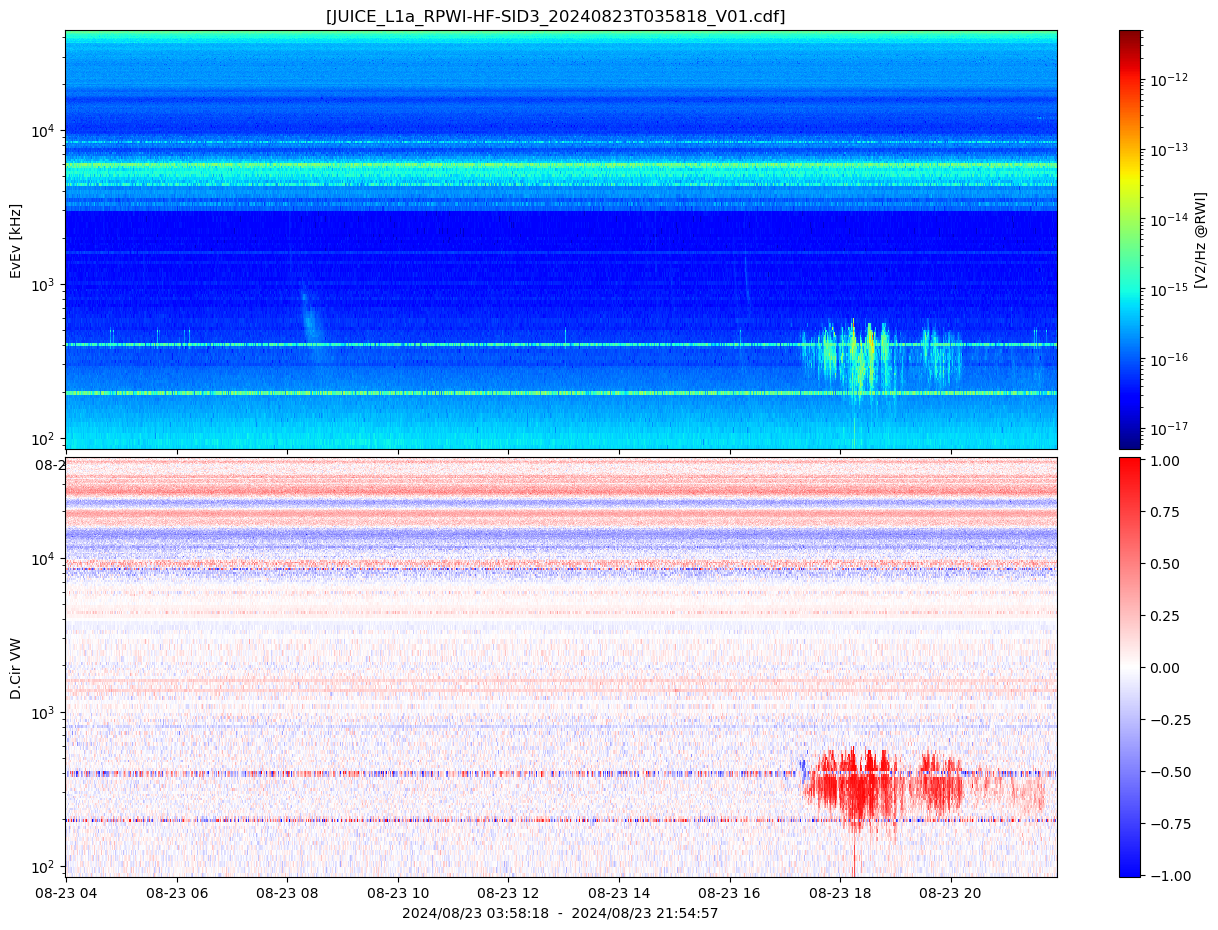

In [21]:
# FT & Cir
p_min = p_min0;  p_max = p_max0
#p_min = -14;     p_max = -12
f_min = f_min0;  f_max = f_max0
#f_min = 100;     f_max = 1000
if f_mode == 0:
    f_min = f_mode_min;  f_max = f_mode_max

fig2d = plt.figure(figsize=[16,11])
if time_mode == 1:
    ax1 = fig2d.add_subplot(3, 1, 1);  ax2 = fig2d.add_subplot(3, 1, 2);  ax3 = fig2d.add_subplot(3, 1, 3);  ax3.set_xlabel(str_date)
else:
    ax1 = fig2d.add_subplot(2, 1, 1);  ax2 = fig2d.add_subplot(2, 1, 2);  ax2.set_xlabel(str_date)
ax1.set_ylim(f_min, f_max);            ax2.set_ylim(f_min, f_max); 
if f_mode == 1:
    ax1.set_yscale('log');             ax2.set_yscale('log')
ax1.set_ylabel('EvEv [kHz]');          ax2.set_ylabel('D.Cir VW');        ax1.set_title("[" + data_name + "]  ")

if time_mode == 1:
    p1 = ax1.pcolormesh(num_1d,   freq_1d, EuEu_2d,    norm=colors.LogNorm  (vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p2 = ax2.pcolormesh(num_1d,   freq_1d, E_DoCvw_2d, norm=colors.Normalize(vmin=-1.01,     vmax=1.01),      cmap='bwr')
    p3 = ax3.plot(np.ravel(data.epoch[:]), '.')
    pp1 = fig2d.colorbar(p1, ax=ax3, orientation="vertical"); pp1.set_label(spec.str_unit)
else:
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d,    norm=colors.LogNorm  (vmin=10**p_min, vmax=10**p_max), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, E_DoCvw_2d, norm=colors.Normalize(vmin=-1.01,     vmax=1.01),      cmap='bwr')
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical");     pp1.set_label(spec.str_unit)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")

# print( "(", num_1d[0],")", Epoch_1d[0], "-", "(", num_1d[-1],")", Epoch_1d[-1] )
if time_mode == 1:
    xlim=[num_1d[0], num_1d[-1]]; ax3.set_xlim(xlim) 
else:
    if t_min0 == 0:
        xlim=[Epoch_1d[0], Epoch_1d[-1]]
    else:
        xlim=[t_min0, t_max0]
    #E_min = '2024-08-23 04:00:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
    #E_max = '2024-08-23 22:00:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
    # print("==>", xlim)
ax1.set_xlim(xlim);  ax2.set_xlim(xlim)

plt.subplots_adjust(hspace=0.02);  plt.show()
if dump_mode == 1:
    png_fname = work_dir+data_name+'_FT-Cir.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_FT-Cir-log.png'
    fig2d.savefig(png_fname)